In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# list all the files in the current directory
path = os.getcwd()
os.listdir(path)

['C6', 'credic_cards.ipynb', 'credit_cards.ipynb', 'Nubank']

In [4]:
nubank_folder = path + '\\Nubank'
# the files in nuabnk folder
os.listdir(nubank_folder)[-10:]

['nubank-2022-07.csv',
 'nubank-2022-08.csv',
 'nubank-2022-09.csv',
 'nubank-2022-10.csv',
 'nubank-2022-11.csv',
 'nubank-2022-12.csv',
 'nubank-2023-01.csv',
 'nubank-2023-02.csv',
 'nubank-2023-03.csv',
 'nubank-2023-04.csv']

In [5]:
df_nubank = pd.DataFrame()
# read all csv files in nubank folder and save them in pandas dataframe
nubank_files = os.listdir(nubank_folder)

for file in nubank_files:
    df_nubank_ = pd.read_csv(nubank_folder + '\\' + file)
    df_nubank = pd.concat([df_nubank, df_nubank_])

# filter payments
df_nubank = df_nubank[df_nubank['amount'] > 0]

df_nubank['reference_month'] = pd.to_datetime(df_nubank['date']).dt.to_period('M')

df_nubank_monthly = df_nubank.groupby('reference_month').sum()
# substitute amount by random number in order to anonymize the data
df_nubank_monthly['amount'] = np.random.randint(100, 1000, df_nubank_monthly.shape[0])
df_nubank_monthly.index = df_nubank_monthly.index.strftime('%Y-%m')
df_nubank_monthly = df_nubank_monthly.sort_values(by='reference_month', ascending=True)[:-1]

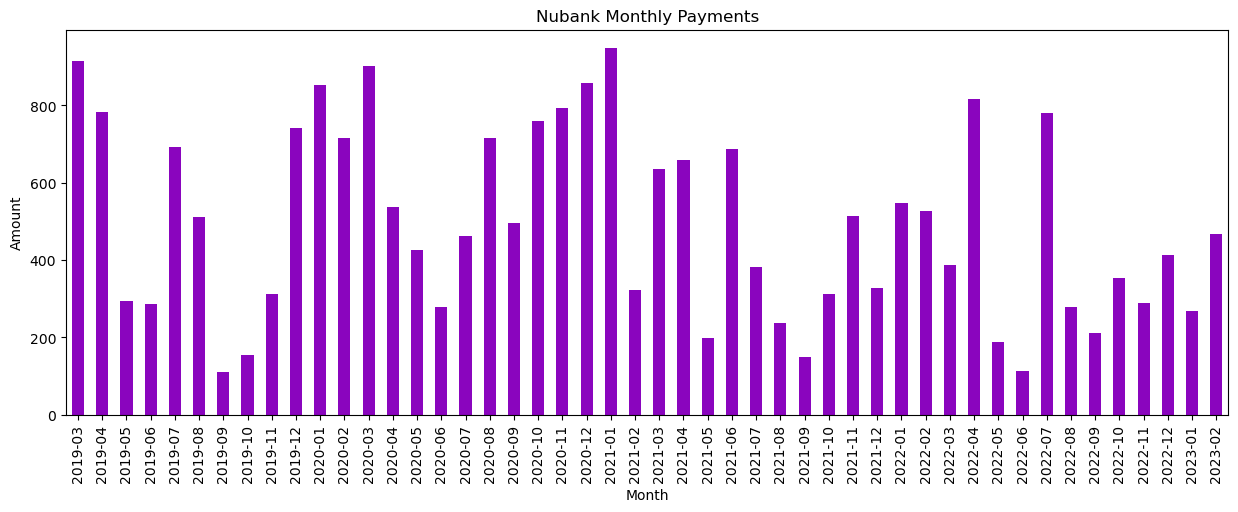

In [6]:
# plot the monthly payments
plt.figure(figsize=(15, 5))
df_nubank_monthly['amount'].plot(kind='bar',color='#8A05BE')
plt.title('Nubank Monthly Payments')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()


In [ ]:
C6_folder = path + '\\C6'
# list the files in c6 folder
os.listdir(C6_folder)[-10:]

['Fatura_2022-07-15.csv',
 'Fatura_2022-08-15.csv',
 'Fatura_2022-09-15.csv',
 'Fatura_2022-10-15.csv',
 'Fatura_2022-11-15.csv',
 'Fatura_2022-12-15.csv',
 'Fatura_2023-01-15.csv',
 'Fatura_2023-02-15.csv',
 'Fatura_2023-03-15.csv',
 'Fatura_2023-04-15.csv']

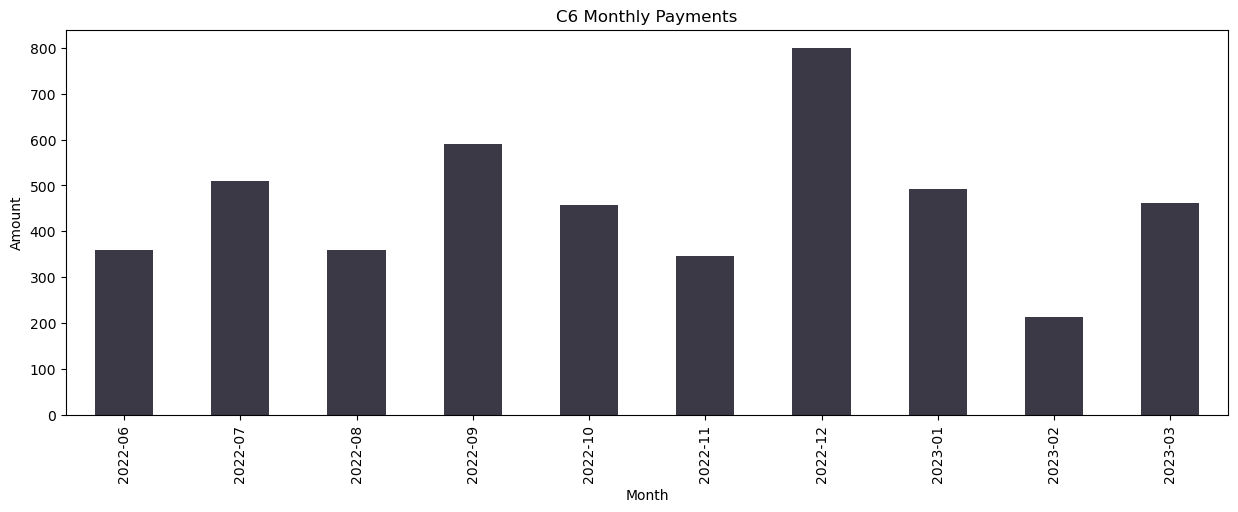

In [ ]:

df_C6 = pd.DataFrame()
# read all csv files in nubank folder and save them in pandas dataframe
c6_files = os.listdir(C6_folder)

for file in c6_files:
    try:
        df_C6_ = pd.read_csv(C6_folder + '\\' + file, sep=';')
        df_C6 = pd.concat([df_C6, df_C6_])
    except:
        print('Error reading file: ' + file)

# filter payments
# df_C6[['Valor (em R$)']] = df_C6[['Valor (em R$)']].replace('.', '', regex=True)
df_C6['Valor (em R$)'] = df_C6['Valor (em R$)'].str.replace('.', '', regex=True)
df_C6['Valor (em R$)'] = df_C6['Valor (em R$)'].str.replace(',', '.', regex=True)
df_C6['Valor (em R$)'] = df_C6['Valor (em R$)'].astype(float)
df_C6.rename(columns={'Valor (em R$)': 'amount'}, inplace=True)

df_C6 = df_C6.query('amount > 0')

df_C6['date'] = pd.to_datetime(df_C6['Data de Compra'], format='%d/%m/%Y')
# from dd/mm/yyyy to yyyy-mm-dd
df_C6['date'] = df_C6['date'].dt.strftime('%Y-%m-%d')
df_C6
df_C6['reference_month'] = pd.to_datetime(df_C6['date']).dt.to_period('M')


df_C6_monthly = df_C6.groupby('reference_month').sum()
df_C6_monthly.index = df_C6_monthly.index.strftime('%Y-%m')
df_C6_monthly = df_C6_monthly.sort_values(by='reference_month', ascending=True)[:-1]

# substitute amount by random number in order to anonymize the data
df_C6_monthly['amount'] = np.random.randint(100, 1000, df_C6_monthly.shape[0])

# plot the monthly payments
plt.figure(figsize=(15, 5))
df_C6_monthly['amount'].plot(kind='bar',color = '#3b3945')
plt.title('C6 Monthly Payments')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()

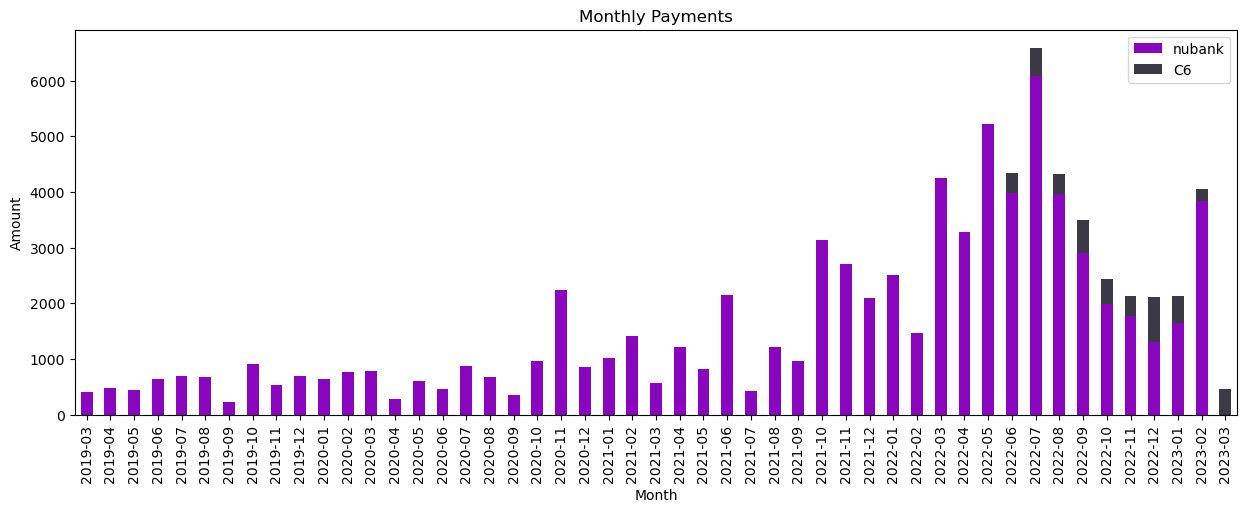

In [ ]:
df_monthly = df_nubank_monthly.merge(df_C6_monthly, left_index=True, right_index=True, how='outer', suffixes=('_nubank', '_C6'))
# replace NaN values with 0
df_monthly.fillna(0, inplace=True)
#replace "amout_" for "" in columns names
df_monthly.columns = df_monthly.columns.str.replace('amount_', '')
# plot the monthly payments as stacked bar
df_monthly.iloc[:].plot(kind='bar', stacked=True, figsize=(15, 5), color=['#8A05BE', '#3b3945'])
#remove y values
plt.title('Monthly Payments')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()